In [1]:
!python --version

Python 3.11.3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
df= pd.read_csv(r'laptop_data.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df['Company'].value_counts() # ---> need to do label encoding

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<Axes: >

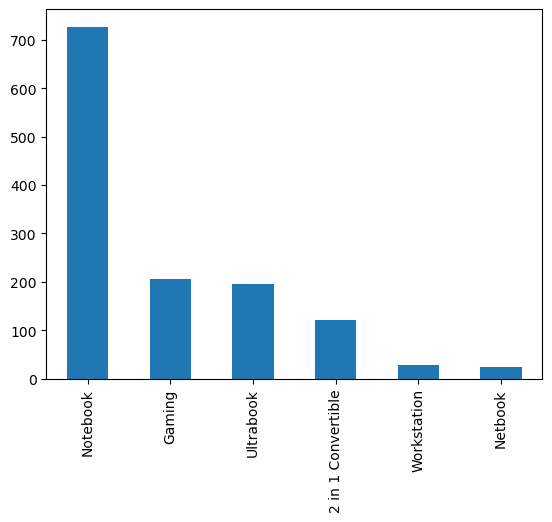

In [9]:
df['TypeName'].value_counts().plot(kind='bar')

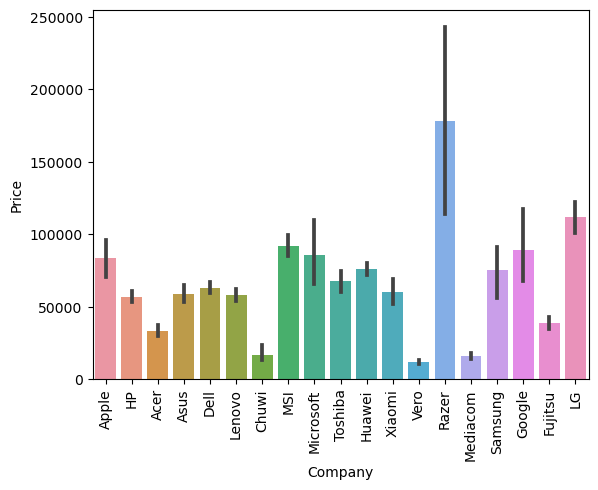

In [10]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [11]:
df['Ram'].value_counts().index.sort_values()

Index(['12GB', '16GB', '24GB', '2GB', '32GB', '4GB', '64GB', '6GB', '8GB'], dtype='object')

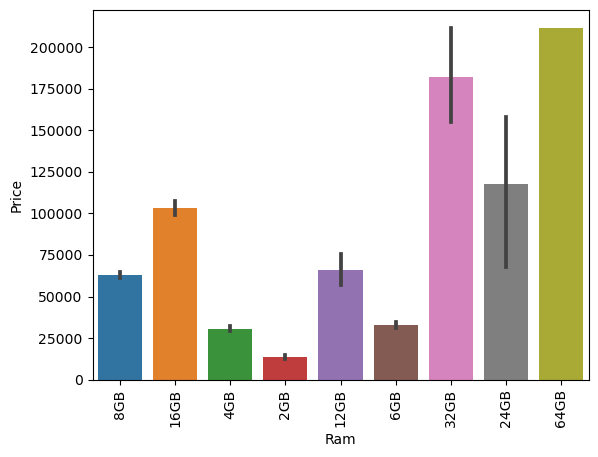

In [12]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

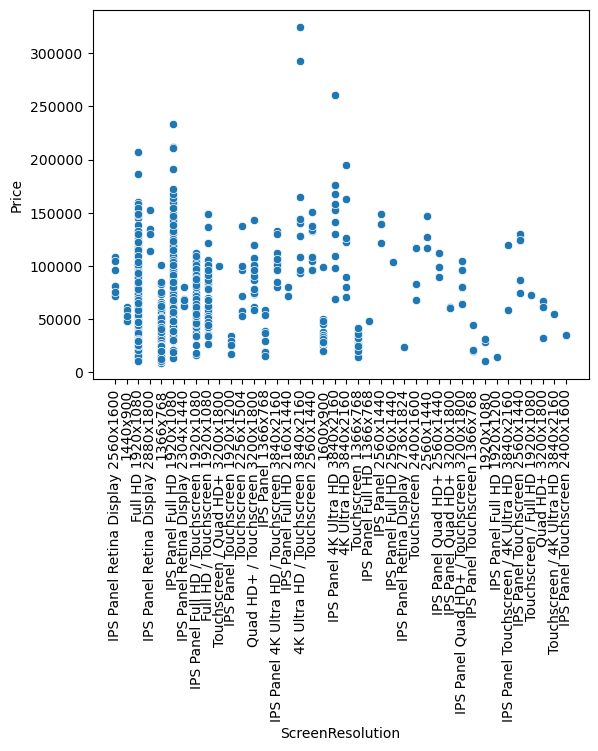

In [13]:
sns.scatterplot(df,x=df['ScreenResolution'],y=df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

In [14]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [15]:
df['X_Resolution']=df['ScreenResolution'].map(lambda x: x.split()[-1].split('x')[0]).astype('int')
df['Y_Resolution']=df['ScreenResolution'].map(lambda x: x.split()[-1].split('x')[1]).astype('int')

In [16]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution
453,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.65kg,71661.60,1920,1080
1251,HP,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,500GB HDD,AMD Radeon R4 Graphics,Windows 10,1.86kg,21258.72,1366,768
840,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.73kg,95850.72,1920,1080
1286,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12,1366,768
1046,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg,78268.32,1920,1080


In [17]:
df['Touchscreen']=df['ScreenResolution'].map(lambda x: 1 if 'Touchscreen' in x else 0)

#df['Touchscreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)


In [18]:
df['IPS']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [19]:
# Drop ScreenResolution column
df= df.drop('ScreenResolution',axis=1)

<Axes: xlabel='IPS', ylabel='Price'>

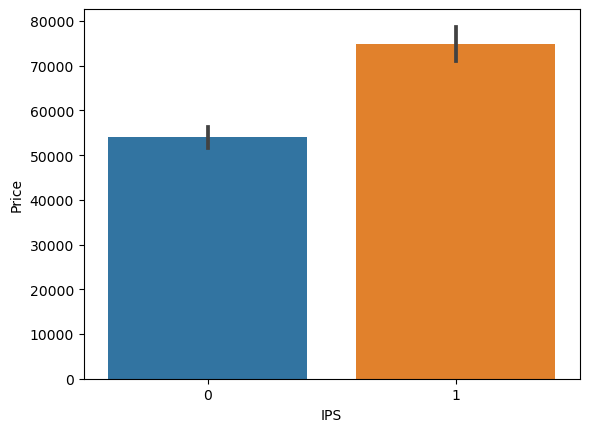

In [20]:
sns.barplot(x=df['IPS'],y=df['Price'])

<Axes: xlabel='Touchscreen', ylabel='Price'>

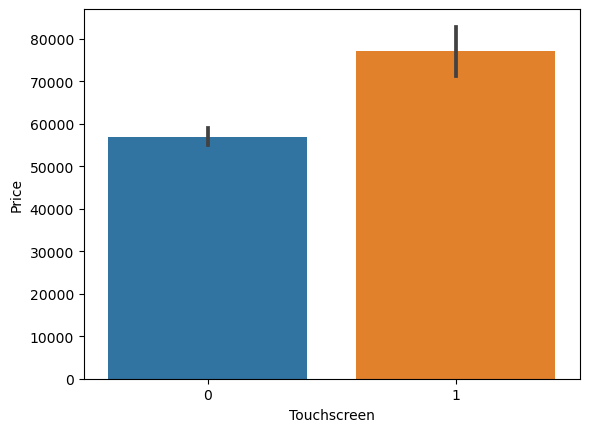

In [21]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [22]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution,Touchscreen,IPS
923,Toshiba,Notebook,15.6,Intel Core i7 6600U 2.6GHz,16GB,256GB SSD,Nvidia GeForce 930M,Windows 10,2.4kg,105228.00,1920,1080,0,1
546,Lenovo,Notebook,14.0,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.87kg,41824.80,1920,1080,0,0
363,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.86kg,34045.92,1920,1080,0,0
314,Asus,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3350 1.1GHz,2GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg,14652.00,1366,768,1,0
1289,Asus,Ultrabook,13.3,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.12,1920,1080,0,1


In [23]:
# Extract CPU info from CPU column and make cpu_name fetaure
df['Cpu_name']=df['Cpu'].apply(lambda x: " ".join(x.split()[:3]))

In [24]:
#Creating CPU processor column by extracting info from cpu
df['Cpu_Processor']=df['Cpu'].apply(lambda x: x.split('G')[0].split()[-1])


In [25]:
df['Cpu_Processor']= df['Cpu_Processor'].astype('float')

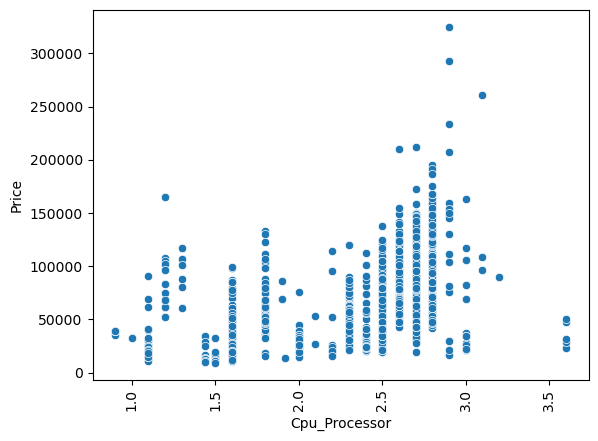

In [26]:
sns.scatterplot(x=df['Cpu_Processor'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
#Function to club all category in one
def cpuType(text):
    if text == 'Intel Core i7' or text== 'Intel Core i5' or text== 'Intel Core i3':
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD'
        
        

In [28]:
df['Cpu_Brand']=df['Cpu_name'].apply(cpuType)

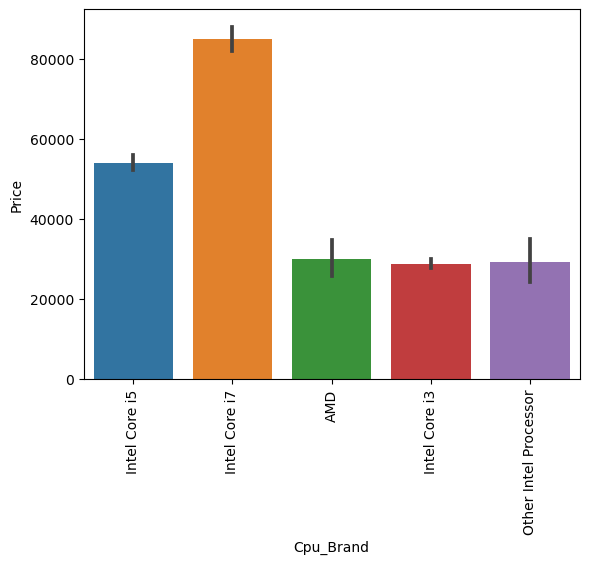

In [29]:
sns.barplot(x=df['Cpu_Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()


In [30]:
df=df.drop(['Cpu_name','Cpu'],axis=1)

In [31]:
df.head(10)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution,Touchscreen,IPS,Cpu_Processor,Cpu_Brand
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1,2.3,Intel Core i5
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,1.8,Intel Core i5
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,0,0,2.5,Intel Core i5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1,2.7,Intel Core i7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1,3.1,Intel Core i5
5,Acer,Notebook,15.6,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,1366,768,0,0,3.0,AMD
6,Apple,Ultrabook,15.4,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016,2880,1800,0,1,2.2,Intel Core i7
7,Apple,Ultrabook,13.3,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360,1440,900,0,0,1.8,Intel Core i5
8,Asus,Ultrabook,14.0,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000,1920,1080,0,0,1.8,Intel Core i7
9,Acer,Ultrabook,14.0,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000,1920,1080,0,1,1.6,Intel Core i5


<Axes: >

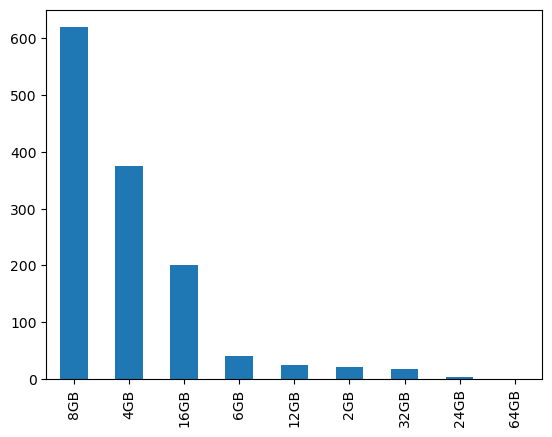

In [32]:
df['Ram'].value_counts().plot(kind='bar')

In [33]:
# converting Ram featur into int type
df['Ram']=df['Ram'].str.replace('GB',"")


<Axes: xlabel='Ram', ylabel='Price'>

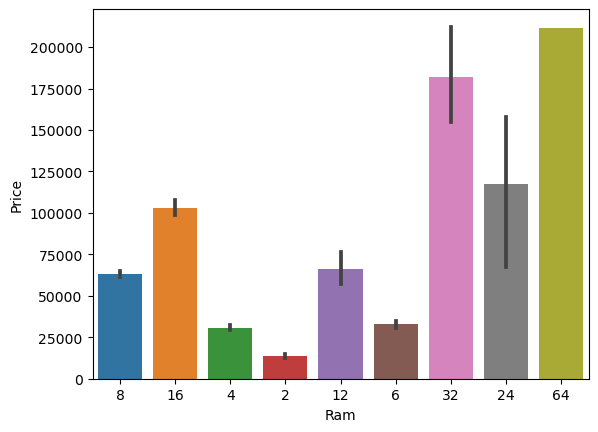

In [34]:
sns.barplot(x=df['Ram'],y=df['Price'],data=df,)

In [35]:
df['Ram']=df['Ram'].astype('int')

In [36]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [37]:


df['Memory']=df['Memory'].astype(str).replace(r'\.0',"",regex=True)   
df['Memory']=df['Memory'].apply(lambda x: x.replace('TB',"000"))
df['Memory']=df['Memory'].apply(lambda x: x.replace('GB',""))
df['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [38]:
new=df["Memory"].str.split("+", n = 1, expand = True)
new.head(5)


,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [39]:
new.fillna('0',inplace=True)

In [40]:
new.head()

,0,1
0,128 SSD,0
1,128 Flash Storage,0
2,256 SSD,0
3,512 SSD,0
4,256 SSD,0


In [41]:
df[df['Memory']=='512 SSD +  1000 HDD'].head(2)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution,Touchscreen,IPS,Cpu_Processor,Cpu_Brand
177,MSI,Gaming,18.4,32,512 SSD + 1000 HDD,Nvidia GTX 980 SLI,Windows 10,4.4kg,149130.72,1920,1080,0,0,2.9,Intel Core i7
200,Dell,Gaming,15.6,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.65kg,98301.60,3840,2160,0,1,2.8,Intel Core i7


In [42]:
new.iloc[177]

0      512 SSD 
1      1000 HDD
Name: 177, dtype: object

In [43]:
new[0] = new[0].str.strip()

df['layer1_ssd']=new[0].apply(lambda x :x.split(" "))
df['SSD_1']=df['layer1_ssd'].apply(lambda x: x[0] if 'SSD' in x else 0)
df['SSD_1']=df['SSD_1'].astype('int')
df['SSD_1']

0       128
1         0
2       256
3       512
4       256
       ... 
1298    128
1299    512
1300      0
1301      0
1302      0
Name: SSD_1, Length: 1303, dtype: int32

In [44]:
df['layer1_hdd']=new[0].apply(lambda x :x.split(" "))
df['HDD_1']=df['layer1_hdd'].apply(lambda x: x[0] if 'HDD' in x else 0)
df['HDD_1']=df['HDD_1'].astype('int')
df['HDD_1']

0          0
1          0
2          0
3          0
4          0
        ... 
1298       0
1299       0
1300       0
1301    1000
1302     500
Name: HDD_1, Length: 1303, dtype: int32

In [45]:
df['layer1_Flash']=new[0].apply(lambda x :x.split(" "))
df['Flash_1']=df['layer1_Flash'].apply(lambda x: x[0] if 'Flash' in x else 0)
df['Flash_1']=df['Flash_1'].astype('int')
df['Flash_1']

0         0
1       128
2         0
3         0
4         0
       ... 
1298      0
1299      0
1300     64
1301      0
1302      0
Name: Flash_1, Length: 1303, dtype: int32

In [46]:
df['layer1_Hybrid']=new[0].apply(lambda x :x.split(" "))
df['Hybrid_1']=df['layer1_Hybrid'].apply(lambda x: x[0] if 'Hybrid' in x else 0)
df['Hybrid_1']=df['Hybrid_1'].astype('int')
df['Hybrid_1']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: Hybrid_1, Length: 1303, dtype: int32

In [47]:
new[1] = new[1].str.strip()
df['layer2_ssd']=new[1].apply(lambda x :x.split(" "))
df['SSD_2']=df['layer2_ssd'].apply(lambda x: x[0] if 'SSD' in x else 0)
df['SSD_2']=df['SSD_2'].astype('int')
df['SSD_2']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: SSD_2, Length: 1303, dtype: int32

In [48]:
df['layer2_hdd']=new[1].apply(lambda x :x.split(" "))
df['HDD_2']=df['layer2_hdd'].apply(lambda x: x[0] if 'HDD' in x else 0)
df['HDD_2']=df['HDD_2'].astype('int')
df['HDD_2']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: HDD_2, Length: 1303, dtype: int32

In [49]:
df['layer2_Flash']=new[1].apply(lambda x :x.split(" "))
df['Flash_2']=df['layer2_Flash'].apply(lambda x: x[0] if 'Flash' in x else 0)
df['Flash_2']=df['Flash_2'].astype('int')
df['Flash_2']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: Flash_2, Length: 1303, dtype: int32

In [50]:
df['layer2_Hybrid']=new[1].apply(lambda x :x.split(" "))
df['Hybrid_2']=df['layer2_Flash'].apply(lambda x: x[0] if 'Hybrid' in x else 0)
df['Hybrid_2']=df['Hybrid_2'].astype('int')
df['Hybrid_2']

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: Hybrid_2, Length: 1303, dtype: int32

In [51]:
df['SSD']= df['SSD_1']+df['SSD_2']
df['HDD']= df['HDD_1']+df['HDD_2']
df['Flash_storage']=df['Flash_1']+df['Flash_2']
df['Hybrid']= df['Hybrid_1']+df['Hybrid_2']

In [52]:
df['SSD']=df['SSD'].astype('int64')
df['HDD']= df['HDD'].astype('int64')

In [53]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,X_Resolution,...,layer2_hdd,HDD_2,layer2_Flash,Flash_2,layer2_Hybrid,Hybrid_2,SSD,HDD,Flash_storage,Hybrid
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,...,[0],0,[0],0,[0],0,128,0,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,...,[0],0,[0],0,[0],0,0,0,128,0
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,...,[0],0,[0],0,[0],0,256,0,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,...,[0],0,[0],0,[0],0,512,0,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,...,[0],0,[0],0,[0],0,256,0,0,0


In [54]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'X_Resolution', 'Y_Resolution', 'Touchscreen', 'IPS',
       'Cpu_Processor', 'Cpu_Brand', 'layer1_ssd', 'SSD_1', 'layer1_hdd',
       'HDD_1', 'layer1_Flash', 'Flash_1', 'layer1_Hybrid', 'Hybrid_1',
       'layer2_ssd', 'SSD_2', 'layer2_hdd', 'HDD_2', 'layer2_Flash', 'Flash_2',
       'layer2_Hybrid', 'Hybrid_2', 'SSD', 'HDD', 'Flash_storage', 'Hybrid'],
      dtype='object')

In [55]:
df.drop(['layer1_ssd','layer2_ssd','SSD_1','SSD_2','layer1_hdd','layer2_hdd','HDD_1','HDD_2',
         'layer1_Flash','layer2_Flash','Flash_1','Flash_2','layer1_Hybrid','layer2_Hybrid','Hybrid_1','Hybrid_2'],axis=1,inplace=True)

In [56]:
df.drop('Memory',axis=1,inplace=True)

In [57]:
df.corr()['Price']

C:\Users\vaibh\AppData\Local\Temp\ipykernel_21312\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches           0.068197
Ram              0.743007
Price            1.000000
X_Resolution     0.556529
Y_Resolution     0.552809
Touchscreen      0.191226
IPS              0.252208
Cpu_Processor    0.430293
SSD              0.670799
HDD             -0.096441
Flash_storage   -0.040511
Hybrid           0.007989
Name: Price, dtype: float64

In [58]:
# df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
# df["Memory"] = df["Memory"].str.replace('GB', '')
# df["Memory"] = df["Memory"].str.replace('TB', '000')
# new = df["Memory"].str.split("+", n = 1, expand = True)

# df["first"]= new[0]
# df["first"]=df["first"].str.strip()

# df["second"]= new[1]

# df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
# df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
# df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
# df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# df['first'] = df['first'].str.replace(r'\D', '')

# df["second"].fillna("0", inplace = True)

# df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
# df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
# df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
# df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# df['second'] = df['second'].str.replace(r'\D', '')

# df["first"] = df["first"].astype(int)
# df["second"] = df["second"].astype(int)

# df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
# df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
# df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
# df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

# df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
#        'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
#        'Layer2Flash_Storage'],inplace=True)

In [59]:
df.head(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,X_Resolution,Y_Resolution,Touchscreen,IPS,Cpu_Processor,Cpu_Brand,SSD,HDD,Flash_storage,Hybrid
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,0,1,2.3,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0,0,1.8,Intel Core i5,0,0,128,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,0,0,2.5,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,0,1,2.7,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,0,1,3.1,Intel Core i5,256,0,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Inches         1303 non-null   float64
 3   Ram            1303 non-null   int32  
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   object 
 7   Price          1303 non-null   float64
 8   X_Resolution   1303 non-null   int32  
 9   Y_Resolution   1303 non-null   int32  
 10  Touchscreen    1303 non-null   int64  
 11  IPS            1303 non-null   int64  
 12  Cpu_Processor  1303 non-null   float64
 13  Cpu_Brand      1303 non-null   object 
 14  SSD            1303 non-null   int64  
 15  HDD            1303 non-null   int64  
 16  Flash_storage  1303 non-null   int32  
 17  Hybrid         1303 non-null   int32  
dtypes: float

In [61]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [62]:
import re
df['Gpu_model']=df['Gpu'].apply(lambda x: x.split(" ")[0])
df['Graph']=df['Gpu'].apply(lambda x: x.split(" ")[-1])
df['GPU_size']= df['Graph'].apply(lambda x: x if re.match(r'\d{5}',x) else 0)

In [63]:
df['GPU_size'].astype('int').inplace=True

In [64]:
df=df[df['Gpu_model']!= 'ARM']


In [65]:
df.drop(['Graph','Gpu'],axis=1,inplace=True)

In [66]:
df.drop('GPU_size',axis=1,inplace=True)

In [67]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [68]:
def os_cat(txt):
    if txt== 'Windows 10' or txt=='Windows 7' or txt=='Windows 10 S':
        return 'Windows'
    elif txt=='macOS' or txt== 'Mac OS X':
        return 'Mac'
    else:
        return 'No Os/Linux/Other'
    
df['OS']=df['OpSys'].apply(os_cat)

In [69]:
df.drop('OpSys',axis=1,inplace=True)

<Axes: xlabel='OS', ylabel='Price'>

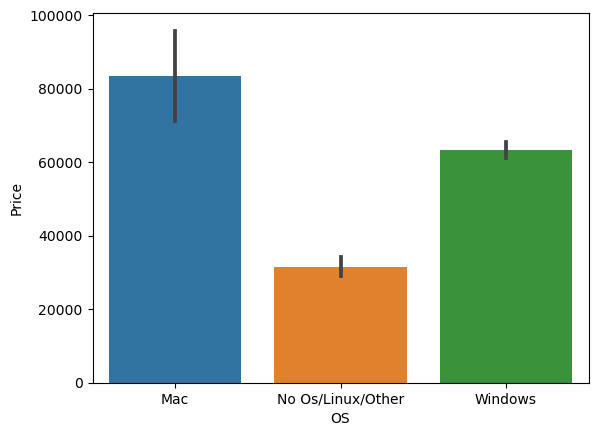

In [70]:
sns.barplot(x=df['OS'],y=df['Price'])

In [71]:
df['Weight']=df['Weight'].str.replace('kg',"").astype('float32')

<Axes: xlabel='Weight', ylabel='Price'>

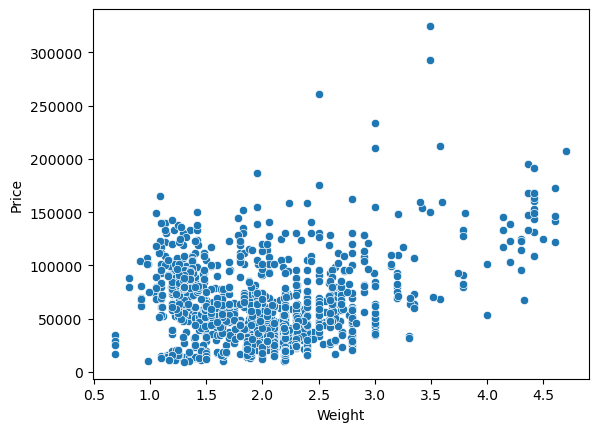

In [72]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [73]:
df['PPI']=np.sqrt(np.square(df['X_Resolution'])+np.square(df['Y_Resolution']))/df['Inches']

In [74]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,X_Resolution,Y_Resolution,Touchscreen,IPS,Cpu_Processor,Cpu_Brand,SSD,HDD,Flash_storage,Hybrid,Gpu_model,OS,PPI
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,2560,1600,0,1,2.3,Intel Core i5,128,0,0,0,Intel,Mac,226.983005
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,1440,900,0,0,1.8,Intel Core i5,0,0,128,0,Intel,Mac,127.677940
2,HP,Notebook,15.6,8,1.86,30636.0000,1920,1080,0,0,2.5,Intel Core i5,256,0,0,0,Intel,No Os/Linux/Other,141.211998
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,2880,1800,0,1,2.7,Intel Core i7,512,0,0,0,AMD,Mac,220.534624
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,2560,1600,0,1,3.1,Intel Core i5,256,0,0,0,Intel,Mac,226.983005


<Axes: xlabel='PPI', ylabel='Price'>

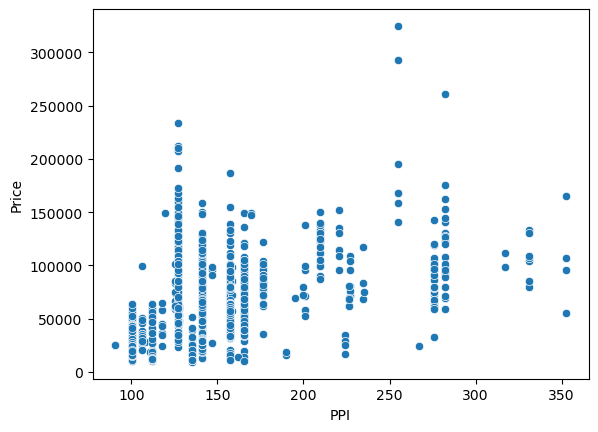

In [75]:
sns.scatterplot(x=df['PPI'],y=df['Price'])

In [76]:
df.drop(['Inches','X_Resolution','Y_Resolution'],axis=1,inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Weight         1302 non-null   float32
 4   Price          1302 non-null   float64
 5   Touchscreen    1302 non-null   int64  
 6   IPS            1302 non-null   int64  
 7   Cpu_Processor  1302 non-null   float64
 8   Cpu_Brand      1302 non-null   object 
 9   SSD            1302 non-null   int64  
 10  HDD            1302 non-null   int64  
 11  Flash_storage  1302 non-null   int32  
 12  Hybrid         1302 non-null   int32  
 13  Gpu_model      1302 non-null   object 
 14  OS             1302 non-null   object 
 15  PPI            1302 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64(4), object(5)
memory usage: 152.6+ KB


In [78]:
# ohe=OneHotEncoder()
# d=ohe.fit_transform(df_test[['Company','TypeName','Cpu_Brand','Gpu_model','OS']]).toarray()
# cat=ohe.categories_
# cat

In [79]:
df.corr()['Price']

C:\Users\vaibh\AppData\Local\Temp\ipykernel_21312\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
Cpu_Processor    0.430122
SSD              0.670660
HDD             -0.096891
Flash_storage   -0.040067
Hybrid           0.007942
PPI              0.475368
Name: Price, dtype: float64

C:\Users\vaibh\AppData\Local\Temp\ipykernel_21312\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

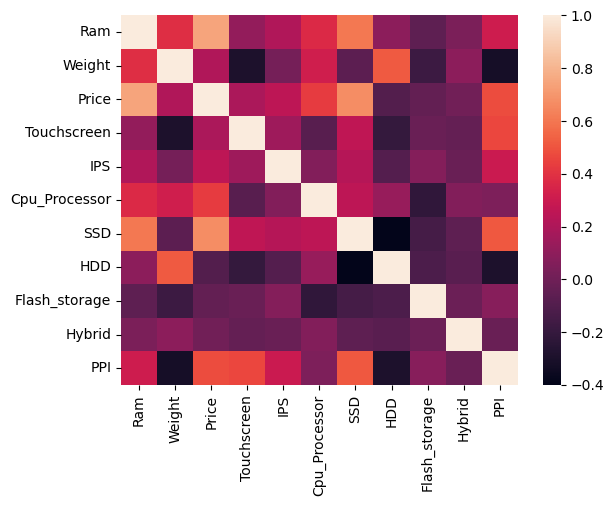

In [80]:
sns.heatmap(df.corr())

C:\Users\vaibh\AppData\Local\Temp\ipykernel_21312\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

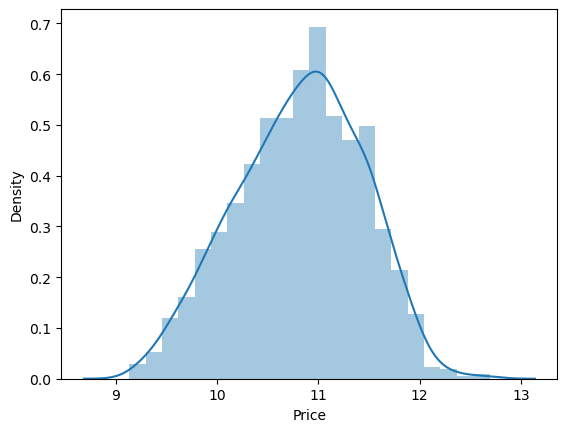

In [81]:
sns.distplot(np.log(df['Price']))

In [82]:
x= df.drop(['Price'],axis=1)
y= np.log(df['Price'])

In [83]:
x.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,Cpu_Processor,Cpu_Brand,SSD,HDD,Flash_storage,Hybrid,Gpu_model,OS,PPI
0,Apple,Ultrabook,8,1.37,0,1,2.3,Intel Core i5,128,0,0,0,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,0,0,1.8,Intel Core i5,0,0,128,0,Intel,Mac,127.677940
2,HP,Notebook,8,1.86,0,0,2.5,Intel Core i5,256,0,0,0,Intel,No Os/Linux/Other,141.211998
3,Apple,Ultrabook,16,1.83,0,1,2.7,Intel Core i7,512,0,0,0,AMD,Mac,220.534624
4,Apple,Ultrabook,8,1.37,0,1,3.1,Intel Core i5,256,0,0,0,Intel,Mac,226.983005


In [84]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1302 non-null   object 
 1   TypeName       1302 non-null   object 
 2   Ram            1302 non-null   int32  
 3   Weight         1302 non-null   float32
 4   Touchscreen    1302 non-null   int64  
 5   IPS            1302 non-null   int64  
 6   Cpu_Processor  1302 non-null   float64
 7   Cpu_Brand      1302 non-null   object 
 8   SSD            1302 non-null   int64  
 9   HDD            1302 non-null   int64  
 10  Flash_storage  1302 non-null   int32  
 11  Hybrid         1302 non-null   int32  
 12  Gpu_model      1302 non-null   object 
 13  OS             1302 non-null   object 
 14  PPI            1302 non-null   float64
dtypes: float32(1), float64(2), int32(3), int64(4), object(5)
memory usage: 142.4+ KB


In [85]:
x.isna().sum()

Company          0
TypeName         0
Ram              0
Weight           0
Touchscreen      0
IPS              0
Cpu_Processor    0
Cpu_Brand        0
SSD              0
HDD              0
Flash_storage    0
Hybrid           0
Gpu_model        0
OS               0
PPI              0
dtype: int64

In [86]:
x.dropna()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,Cpu_Processor,Cpu_Brand,SSD,HDD,Flash_storage,Hybrid,Gpu_model,OS,PPI
0,Apple,Ultrabook,8,1.37,0,1,2.3,Intel Core i5,128,0,0,0,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,0,0,1.8,Intel Core i5,0,0,128,0,Intel,Mac,127.677940
2,HP,Notebook,8,1.86,0,0,2.5,Intel Core i5,256,0,0,0,Intel,No Os/Linux/Other,141.211998
3,Apple,Ultrabook,16,1.83,0,1,2.7,Intel Core i7,512,0,0,0,AMD,Mac,220.534624
4,Apple,Ultrabook,8,1.37,0,1,3.1,Intel Core i5,256,0,0,0,Intel,Mac,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,2.5,Intel Core i7,128,0,0,0,Intel,Windows,157.350512
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,2.5,Intel Core i7,512,0,0,0,Intel,Windows,276.053530
1300,Lenovo,Notebook,2,1.50,0,0,1.6,Other Intel Processor,0,0,64,0,Intel,Windows,111.935204
1301,HP,Notebook,6,2.19,0,0,2.5,Intel Core i7,0,1000,0,0,AMD,Windows,100.454670


In [87]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [88]:
y.isna().sum()

0

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=5)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1106, 15), (196, 15), (1106,), (196,))

In [90]:
# create Pipeline

step_1=ColumnTransformer(transformers=[
                                        ('Col_tnf',OneHotEncoder(sparse=False,drop='first',),[0,1,7,12,13])],
                                          remainder='passthrough')
step_2= LinearRegression()

linear_pipe=Pipeline([
                ('step1',step_1),
                ('step2',step_2)
              ])
                         
linear_pipe.fit(x_train,y_train)

y_pred_test=linear_pipe.predict(x_test)
y_pred_train= linear_pipe.predict(x_train)
                         
                         
print(f'Accuracy_Trainig:= {r2_score(y_train,y_pred_train)}')
print(f'MAE:= {mean_absolute_error(y_train,y_pred_train)}')
print('Testing Data'.center(40,'*'))
print(f'Accuracy_Testing:= {r2_score(y_test,y_pred_test)}')
print(f'MAE:= {mean_absolute_error(y_test,y_pred_test)}')
                         

Accuracy_Trainig:= 0.8388849971310167
MAE:= 0.19328047914316138
**************Testing Data**************
Accuracy_Testing:= 0.8256129863933231
MAE:= 0.20904202168004882


C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
#KNN regression without hyperparameter

step_1=ColumnTransformer(transformers=[
                                        ('Col_tnf',OneHotEncoder(sparse=False,drop='first',),[0,1,7,12,13])],
                                          remainder='passthrough')
step_2= KNeighborsRegressor()

KNN_pipe=Pipeline([
                ('step1',step_1),
                ('step2',step_2)
              ])
                         
KNN_pipe.fit(x_train,y_train)

y_pred_test=KNN_pipe.predict(x_test)
y_pred_train= KNN_pipe.predict(x_train)
                         
                         
print(f'Accuracy_Trainig:= {r2_score(y_train,y_pred_train)}')
print(f'MAE:= {mean_absolute_error(y_train,y_pred_train)}')
print('Testing Data'.center(40,'*'))
print(f'Accuracy_Testing:= {r2_score(y_test,y_pred_test)}')
print(f'MAE:= {mean_absolute_error(y_test,y_pred_test)}')

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy_Trainig:= 0.8690235419320186
MAE:= 0.16833643064599793
**************Testing Data**************
Accuracy_Testing:= 0.822961208665425
MAE:= 0.21554019667569663


In [92]:
import pickle

In [93]:
# with open('model.pkl','wb') as file:
#     pickle.dump(KNN_pipe,file)

In [94]:
pickle.dump(df,(open('df.pkl','wb')))

In [95]:
pickle.dump(KNN_pipe,(open('model.pkl','wb')))

In [96]:
m= '1920x1080'
x_resolution= (m.split('x')[0])
y_resolution= (m.split('x')[1])
type(np.sqrt(np.square(int(x_resolution))+np.square(int(y_resolution))/15))

numpy.float64

In [97]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 1265 to 867
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1106 non-null   object 
 1   TypeName       1106 non-null   object 
 2   Ram            1106 non-null   int32  
 3   Weight         1106 non-null   float32
 4   Touchscreen    1106 non-null   int64  
 5   IPS            1106 non-null   int64  
 6   Cpu_Processor  1106 non-null   float64
 7   Cpu_Brand      1106 non-null   object 
 8   SSD            1106 non-null   int64  
 9   HDD            1106 non-null   int64  
 10  Flash_storage  1106 non-null   int32  
 11  Hybrid         1106 non-null   int32  
 12  Gpu_model      1106 non-null   object 
 13  OS             1106 non-null   object 
 14  PPI            1106 non-null   float64
dtypes: float32(1), float64(2), int32(3), int64(4), object(5)
memory usage: 121.0+ KB


In [98]:
df.iloc[0:2]

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,Cpu_Processor,Cpu_Brand,SSD,HDD,Flash_storage,Hybrid,Gpu_model,OS,PPI
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,2.3,Intel Core i5,128,0,0,0,Intel,Mac,226.983005
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,1.8,Intel Core i5,0,0,128,0,Intel,Mac,127.677940


In [99]:
array = np.array([['Apple','Ultrabook',8,1.37,0,1,2.3,'Intel Core i5',128,0,0,0,'Intel','Mac',227]],dtype=object)
# array=array.reshape(1,15).astype('object')

In [100]:
array1 = np.array(['Apple','Ultrabook',8,1.37,0,1,227,2.3,'Intel Core i5',128,0,0,0,'Intel','Mac'],dtype=object)
array1

array(['Apple', 'Ultrabook', 8, 1.37, 0, 1, 227, 2.3, 'Intel Core i5',
       128, 0, 0, 0, 'Intel', 'Mac'], dtype=object)

In [118]:
linear_pipe.predict(array).tolist()

C:\Users\vaibh\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


[11.35599136352539]

In [109]:
a.tolist()

[11.35599136352539]

In [113]:
!pip install jsonify


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jsonify: filename=jsonify-0.5-py3-none-any.whl size=1544 sha256=e7063470bfcef52dc9db2ac3c736adfa7d6ce7386e36b77412f262683b06a46c
  Stored in directory: c:\users\vaibh\appdata\local\pip\cache\wheels\8b\0b\70\cd8a2f72ec6e8dbab2d7fffe3e8a545f4d152255cc7e8541f5
Successfully built jsonify


NameError: name 'jsonify' is not defined

In [115]:
jsonify(a)

NameError: name 'jsonify' is not defined

In [102]:
Touchscreen='Yes'
Touchscreen = 1 if Touchscreen == 'Yes' else 0
Touchscreen

1